## Forecast of Brent, Henry Hub Gas, API2 Coal and Gasoline Prices

Baris Sanli
barissanli2@gmail.com
github.com/barissanli

Originally the code from [Assembly AI](https://twitter.com/AssemblyAI/status/1585245464512720897/photo/1)

In this code, data from Yahoo Finance is used to forecast prices for selected items from Yahoo finance. There are two functions defined
1. **get_yahoo_data** : As you insert yahoo finance quotes, it extracts data from yahoo finance data services for a default of 365 days


> For example: 
Extracting 365 days of Brent price data
**data=get_yahoo_data("BZ=F",365)**

2. **forecast_days** : takes the data and makes a forecast of minimum 90 days

> For example:
Forecasting for the next 45 days
**forecast_days(data,45)**


In [ ]:
# load the yahoo finance library to download yahoo data
!pip install yfinance

In [1]:
# import libraries
from datetime import date, timedelta, datetime
import yfinance as yf
from prophet import Prophet

In [2]:
def get_yahoo_data(quote="BZ=F",days_of_data=365):
  START = (datetime.today() - timedelta(days=days_of_data)).strftime("%Y-%m-%d")
  TODAY = date.today().strftime("%Y-%m-%d")
  data = yf.download(quote, START, TODAY)
  data.reset_index(inplace=True)
  return data

In [3]:
def forecast_days(data, forward_days=90):
  # Predict forecast with Prophet.
  df_train = data[['Date', 'Close']];
  df_train = df_train.rename (columns={"Date": "ds", "Close": "y"});
  m = Prophet();
  m.fit(df_train);
  # create days to predict
  period = forward_days;
  future = m.make_future_dataframe(periods=period);
  forecast = m.predict(future);
  fig1 = m.plot(forecast);
  ax = fig1.gca();
  ax.set_title(yf.Ticker(quote).info['shortName'], size=14)
  return forecast

In Yahoo Finance dataset(next month, currently traded):
* BZ=F is Brent
* NG=F is natural gas 
* MTF=F is API 2 coal
* RB=F is Gasoline

It will take sometime with some printing on the screen for a minute or so. Afterwards all the figures will be displayed

[*********************100%***********************]  1 of 1 completed


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
18:31:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
18:31:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


18:31:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
18:31:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
18:31:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
18:31:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


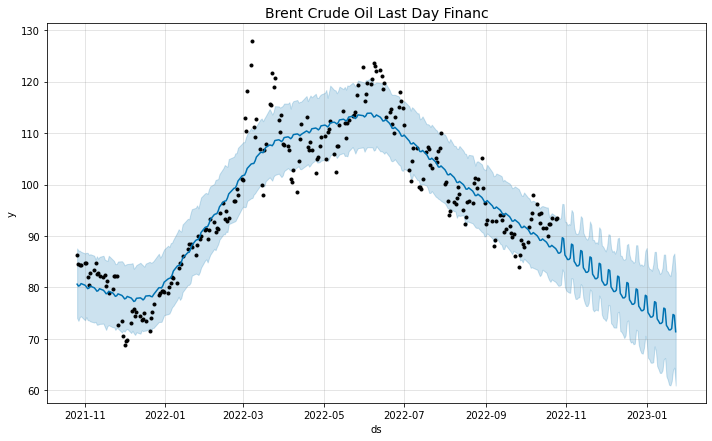

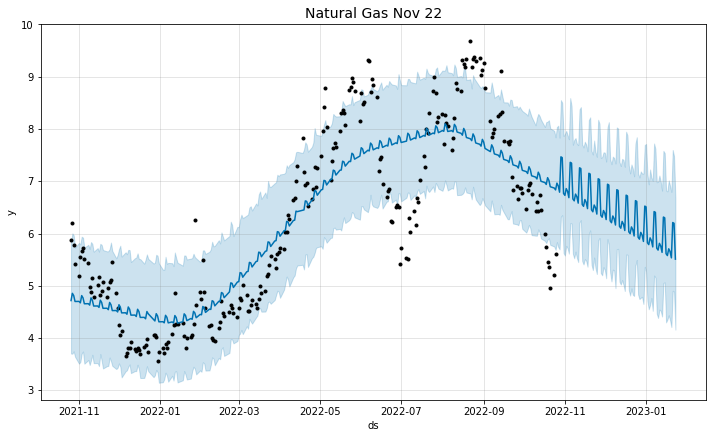

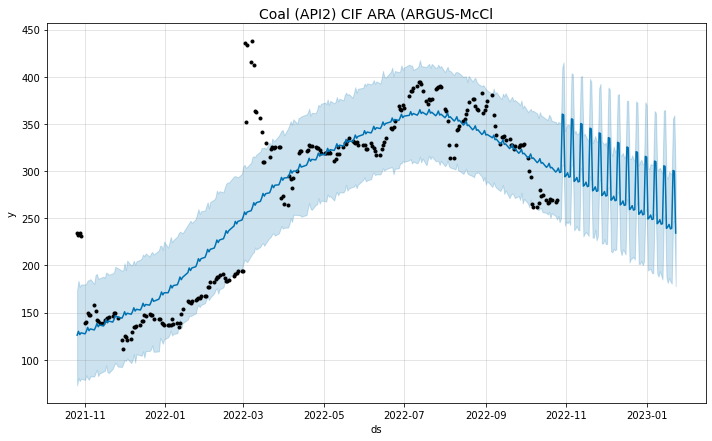

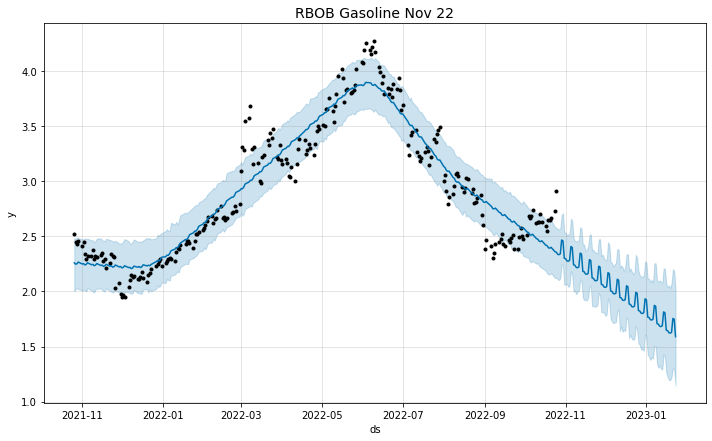

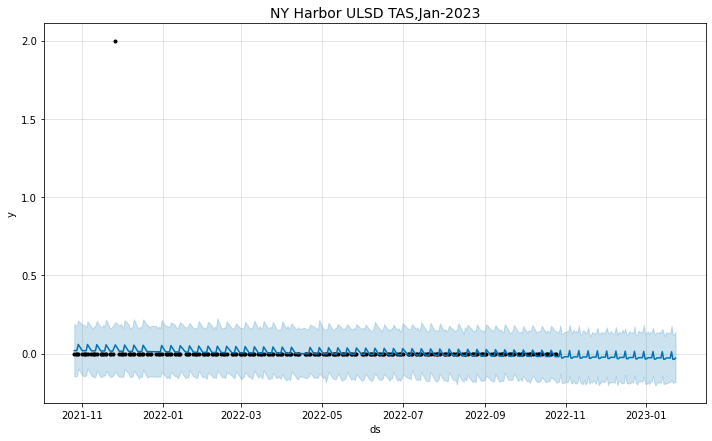

In [4]:
historical_days= 365 #days
future_days=90
quotes=['BZ=F', 'NG=F', 'MTF=F', 'RB=F']
for quote in quotes:
  data=get_yahoo_data(quote,historical_days)
  forecast_days(data,future_days)

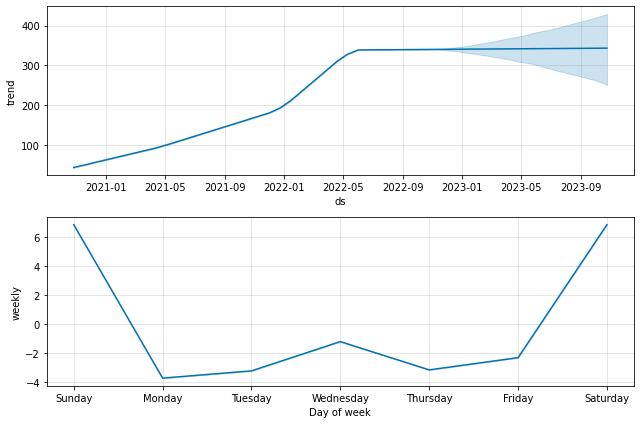

In [46]:
# plot trend, weekly, and yearly forecast
# fig2 = m.plot_components (forecast)